In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the prepared data from the CSV file into a DataFrame
data = pd.read_csv('Datasets/Cleaned_prepared_data.csv')

In [3]:
# Selecting the features and targets
features = data[['latitude', 'longitude', 'baro_altitude','ground_speed', 'track', 'vertical_rate', 'Climbing', 'Descending', 'Cruise']]
targets = data[['latitude_in_10min', 'longitude_in_10min', 'baro_altitude_in_10min']]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.5, random_state=42)

# Creating a RandomForestRegressor model with 100 trees
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# The model is now trained and can be used for predictions
"Model trained successfully"

'Model trained successfully'

In [4]:
# Predictions on the training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluating the model's performance using Mean Absolute Error and R-squared metrics
mae_train = mean_absolute_error(y_train, train_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

# Displaying the evaluation metrics
(mae_train, mae_test, r2_train, r2_test)

(88.33120461909475, 235.61965448314444, 0.9965065414763257, 0.9743883845457274)

In [5]:
# Separating the predictions and true values for latitude and longitude
train_lat_true, train_long_true, train_alt_true = y_train['latitude_in_10min'], y_train['longitude_in_10min'], y_train['baro_altitude_in_10min']
test_lat_true, test_long_true, test_alt_true = y_test['latitude_in_10min'], y_test['longitude_in_10min'], y_test['baro_altitude_in_10min']
train_lat_pred, train_long_pred, train_alt_pred = train_predictions[:, 0], train_predictions[:, 1], train_predictions[:, 2]
test_lat_pred, test_long_pred, test_alt_pred = test_predictions[:, 0], test_predictions[:, 1], test_predictions[:, 2]

# Calculating metrics for latitude
mae_train_lat = mean_absolute_error(train_lat_true, train_lat_pred)
mae_test_lat = mean_absolute_error(test_lat_true, test_lat_pred)
r2_train_lat = r2_score(train_lat_true, train_lat_pred)
r2_test_lat = r2_score(test_lat_true, test_lat_pred)

# Calculating metrics for longitude
mae_train_long = mean_absolute_error(train_long_true, train_long_pred)
mae_test_long = mean_absolute_error(test_long_true, test_long_pred)
r2_train_long = r2_score(train_long_true, train_long_pred)
r2_test_long = r2_score(test_long_true, test_long_pred)

# Calculating metrics for Altitude
mae_train_alt = mean_absolute_error(train_alt_true, train_alt_pred)
mae_test_alt = mean_absolute_error(test_alt_true, test_alt_pred)
r2_train_alt = r2_score(train_alt_true, train_alt_pred)
r2_test_alt = r2_score(test_alt_true, test_alt_pred)

print("Latitude metrics:", mae_train_lat, mae_test_lat, r2_train_lat, r2_test_lat)
print("Longitude metrics:", mae_train_long, mae_test_long, r2_train_long, r2_test_long)
print("Altitude metrics:", mae_train_alt, mae_test_alt, r2_train_alt, r2_test_alt)

Latitude metrics: 0.02976241663540073 0.07856849768717897 0.9995458551608604 0.9961495604479947
Longitude metrics: 0.03512133394428628 0.09458155723064203 0.9951615170579748 0.9639733479240655
Altitude metrics: 264.9287301067046 706.6858133945155 0.9948122522101418 0.9630422452651217


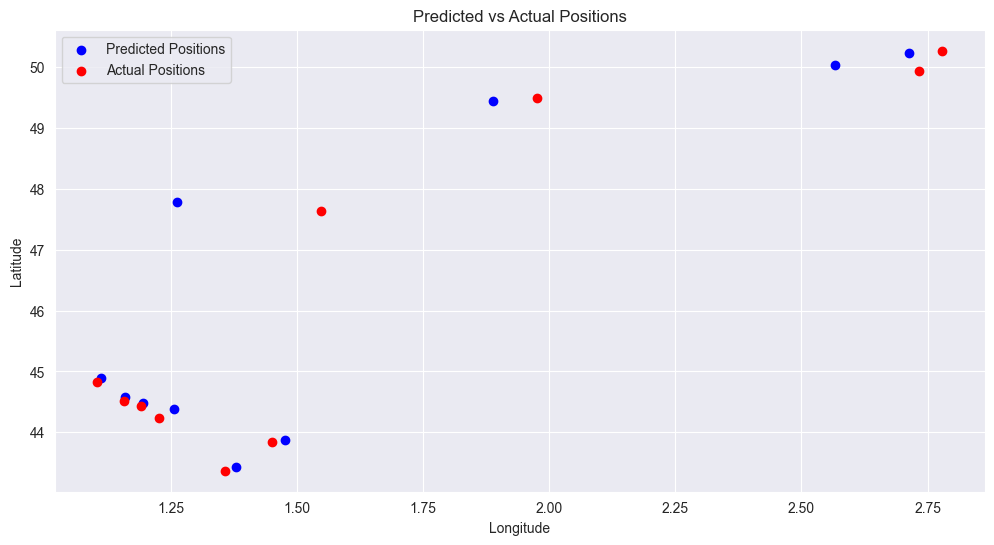

In [6]:
# Selecting a few random samples from the test dataset for prediction
np.random.seed(8)
sample_indices = np.random.choice(X_test.index, size=10, replace=False)
sample_data = X_test.loc[sample_indices]

# Using the model to predict the latitude and longitude in 10 minutes
predicted_positions = model.predict(sample_data)

# Actual positions for comparison
actual_positions = y_test.loc[sample_indices]

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(predicted_positions[:, 1], predicted_positions[:, 0], color='blue', label='Predicted Positions')# Plotting predicted positions
plt.scatter(actual_positions['longitude_in_10min'], actual_positions['latitude_in_10min'], color='red', label='Actual Positions') # Plotting actual positions
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted vs Actual Positions')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Selecting a few example data points from the test set
example_data = X_test.sample(5, random_state=1)

# Actual values for comparison
actual_values = y_test.loc[example_data.index]

# Making predictions
predictions = model.predict(example_data)

# Creating a DataFrame for comparison
comparison = pd.DataFrame({
    'Actual Latitude': actual_values['latitude_in_10min'],
    'Predicted Latitude': predictions[:, 0],
    'Latitude Error': np.abs(actual_values['latitude_in_10min'] - predictions[:, 0]),
    'Actual Longitude': actual_values['longitude_in_10min'],
    'Predicted Longitude': predictions[:, 1],
    'Longitude Error': np.abs(actual_values['longitude_in_10min'] - predictions[:, 1]),
    'Actual Altitude': actual_values['baro_altitude_in_10min'],
    'Predicted Altitude': predictions[:, 2],
    'Altitude Error': np.abs(actual_values['baro_altitude_in_10min'] - predictions[:, 2])
})

# Display the dataframe
comparison.reset_index(drop=True, inplace=True)
comparison

,Actual Latitude,Predicted Latitude,Latitude Error,Actual Longitude,Predicted Longitude,Longitude Error,Actual Altitude,Predicted Altitude,Altitude Error
0,42.507568,42.602562,0.094994,1.750509,1.628590,0.121919,37725.0,34608.00,3117.00
1,48.528168,48.329862,0.198306,1.623371,1.491574,0.131796,36000.0,35999.75,0.25
2,49.656760,49.644001,0.012759,2.654237,2.472124,0.182114,38000.0,37399.75,600.25
3,47.864452,47.851722,0.012730,1.192721,1.147966,0.044754,38000.0,38256.50,256.50
4,50.909388,50.924632,0.015244,3.357162,3.377521,0.020358,27525.0,25437.00,2088.00
